In [ ]:
!pip install -q geopandas 
!pip install -q -U libpysal
!pip install -q -U mapclassify
!pip install -q -U --no-cache-dir gdown --pre

import pandas as pd
import numpy as np
import openpyxl
import csv
import sqlite3
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import geopandas as gpd

!gdown 1iDEUTmZubD6eqY6at-NVACaJYIHshwU4
!gdown 1vlx53MUzIFdXXDXZT76oD2-IMTbTk0l0
!gdown 1kRiFuJeQrGNoIxo4HKxKxryRiUnEBWHz
!gdown -q https://drive.google.com/drive/folders/1-yv1tUrb_IZtlxwW-_4ujT6IL0L6uozj --folder
!gdown -q https://drive.google.com/drive/folders/1769hJh1Q1vffsyUxq8AVUAUFzf9KrzkO --folder

     |████████████████████████████████| 1.1 MB 4.7 MB/s 
     |████████████████████████████████| 16.6 MB 58.2 MB/s 
     |████████████████████████████████| 7.8 MB 49.5 MB/s 
     |████████████████████████████████| 2.4 MB 5.0 MB/s 
Downloading...
From: https://drive.google.com/uc?id=1iDEUTmZubD6eqY6at-NVACaJYIHshwU4
To: /content/crash_data_2009.csv
100% 186M/186M [00:01<00:00, 176MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vlx53MUzIFdXXDXZT76oD2-IMTbTk0l0
To: /content/annual_miles_traveled_2009.csv
100% 14.6k/14.6k [00:00<00:00, 18.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kRiFuJeQrGNoIxo4HKxKxryRiUnEBWHz
To: /content/crashes.csv
100% 193M/193M [00:01<00:00, 193MB/s]


# Research Question
# Predict whether a crash is hit-and-run based on 'road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population'

# Crashes Dataframe

In [ ]:
crashes = pd.read_csv("crash_data_2009.csv", dtype=object)
crashes

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,...,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,3858022,1005,P379,2C,not chp,>250000,1005,fresno,0,not chp,...,0,0,0,NaN,NaN,NaN,NaN,2009-02-03,17:11:00,2009-04-27
1,3899441,9120,17248,NaN,2200 thru 0559,2500 to 10000,0801,del norte,0,chp state highway,...,0,0,0,NaN,NaN,NaN,NaN,2009-02-28,01:45:00,2009-11-02
2,3899442,9530,19005,NaN,0600 thru 1359,>250000,1942,los angeles,0,chp state highway,...,0,0,0,NaN,NaN,33.86465,-118.28533,2009-02-09,10:20:00,2010-01-14
3,3899445,9530,19284,NaN,1400 thru 2159,>250000,1942,los angeles,0,chp state highway,...,0,0,0,NaN,NaN,33.7912,-118.2823,2009-02-18,15:50:00,2010-01-13
4,3899446,9530,19289,NaN,1400 thru 2159,25000 to 50000,1939,los angeles,0,chp state highway,...,0,0,0,NaN,NaN,33.8845,-118.3526,2009-02-11,17:35:00,2010-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426223,5051991,3610,50717,SBPD,not chp,100000 to 250000,3610,san bernardino,0,not chp,...,0,0,0,NaN,NaN,NaN,NaN,2009-12-21,08:26:00,2011-02-17
426224,5051995,3610,50640,B,not chp,100000 to 250000,3610,san bernardino,0,not chp,...,0,0,0,NaN,NaN,NaN,NaN,2009-12-21,16:21:00,2011-02-17
426225,5051996,3610,50165,3610,not chp,100000 to 250000,3610,san bernardino,0,not chp,...,0,0,0,NaN,NaN,NaN,NaN,2009-12-24,09:04:00,2011-02-18
426226,5051999,3610,50705,NaN,not chp,100000 to 250000,3610,san bernardino,0,not chp,...,0,0,0,NaN,NaN,NaN,NaN,2009-12-21,19:14:00,2011-02-17


In [ ]:
crashes['county_location'].unique()

array(['fresno', 'del norte', 'los angeles', 'santa clara', 'butte',
       'merced', 'orange', 'sacramento', 'sutter', 'santa cruz',
       'san francisco', 'san bernardino', 'san diego', 'san mateo',
       'lake', 'contra costa', 'marin', 'colusa', 'kern', 'madera',
       'riverside', 'mendocino', 'san luis obispo', 'nevada',
       'san joaquin', 'tulare', 'placer', 'kings', 'santa barbara',
       'tehama', 'alameda', 'solano', 'ventura', 'napa', 'humboldt',
       'sonoma', 'yolo', 'stanislaus', 'shasta', 'yuba', 'glenn',
       'calaveras', 'imperial', 'el dorado', 'alpine', 'monterey',
       'tuolumne', 'san benito', 'siskiyou', 'mono', 'plumas', 'mariposa',
       'inyo', 'modoc', 'amador', 'sierra', 'lassen', 'trinity'],
      dtype=object)

# EDA

In [ ]:
for column in crashes.columns:
  print(column)
  print(crashes[column].values[:5])

case_id
['3858022' '3899441' '3899442' '3899445' '3899446']
jurisdiction
['1005' '9120' '9530' '9530' '9530']
officer_id
['P379' '17248' '19005' '19284' '19289']
reporting_district
['2C' nan nan nan nan]
chp_shift
['not chp' '2200 thru 0559' '0600 thru 1359' '1400 thru 2159'
 '1400 thru 2159']
population
['>250000' '2500 to 10000' '>250000' '>250000' '25000 to 50000']
county_city_location
['1005' '0801' '1942' '1942' '1939']
county_location
['fresno' 'del norte' 'los angeles' 'los angeles' 'los angeles']
special_condition
['0' '0' '0' '0' '0']
beat_type
['not chp' 'chp state highway' 'chp state highway' 'chp state highway'
 'chp state highway']
chp_beat_type
['not chp' 'us highway' 'interstate' 'interstate' 'interstate']
city_division_lapd
[nan nan nan nan nan]
chp_beat_class
['not chp' 'chp other' 'chp other' 'chp other' 'chp other']
beat_number
['2257' '005' '110' '120' '400']
primary_road
['1ST ST' 'RT 101' 'RT 110' 'RT 110' 'RT 405']
secondary_road
['EAST CLINTON' 'RUDISILL RD' 'RT

In [ ]:
# check whether there are duplicates in our data
crashes.duplicated().sum()

0

In [ ]:
# check for missing values in the dataset
crashes.isnull().sum()

case_id                    0
jurisdiction             855
officer_id              2138
reporting_district    257894
chp_shift                  0
                       ...  
latitude              307116
longitude             307116
collision_date             0
collision_time          3766
process_date               0
Length: 75, dtype: int64

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Hit and Run

In [ ]:
crashes['hit_and_run'].isnull().sum()

0

In [ ]:
crashes['hit_and_run'].unique()

array(['not hit and run', 'misdemeanor', 'felony'], dtype=object)

In [ ]:
crashes['hit_and_run'].value_counts()

not hit and run    346061
misdemeanor         69441
felony              10726
Name: hit_and_run, dtype: int64

In [ ]:
# Since I am only predicting whether a crash is a hit and run, I am going to make this a binary variable
crashes["hit_and_run"] = np.where(crashes["hit_and_run"].str.contains("not hit and run"), 1, 0)

In [ ]:
crashes['hit_and_run'].unique()

array([1, 0])

In [ ]:
crashes['hit_and_run'].value_counts()

1    346061
0     80167
Name: hit_and_run, dtype: int64

In [ ]:
np.array(crashes['hit_and_run'].value_counts())

array([346061,  80167])

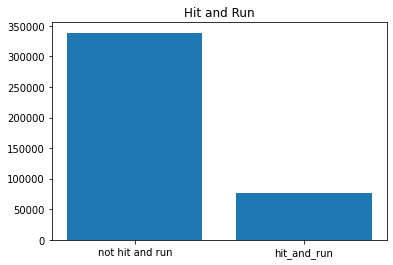

In [ ]:
labels = ['not hit and run', 'hit_and_run']
counts = np.array(crashes['hit_and_run'].value_counts())
plt.bar(labels,counts)
plt.title('Hit and Run')
plt.show()

# road_surface

In [ ]:
crashes['road_surface'].isnull().sum()

4196

In [ ]:
crashes.dropna(subset=['road_surface'], inplace=True)

In [ ]:
crashes['road_surface'].isnull().sum()

0

In [ ]:
crashes['road_surface'].unique()

array(['dry', 'wet', 'snowy', 'slippery'], dtype=object)

In [ ]:
crashes['road_surface'].value_counts()

dry         384472
wet          35062
snowy         2108
slippery       390
Name: road_surface, dtype: int64

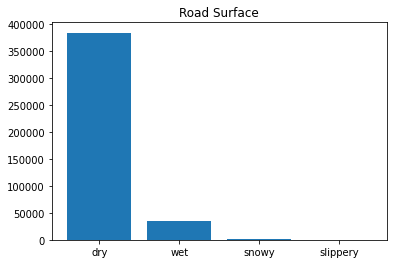

In [ ]:
labels = ['dry', 'wet', 'snowy', 'slippery']
counts = [384472, 35062, 2108, 390]
plt.bar(labels,counts)
plt.title('Road Surface')
plt.show()

In [ ]:
crashes['road_surface'] = labelencoder.fit_transform(crashes['road_surface'])

In [ ]:
crashes['road_surface'].unique()


array([0, 3, 2, 1])

# lighting

In [ ]:
crashes['lighting'].isnull().sum()

1468

In [ ]:
crashes.dropna(subset=['lighting'], inplace=True)

In [ ]:
crashes['lighting'].isnull().sum()

0

In [ ]:
crashes['lighting'].unique()

array(['daylight', 'dark with no street lights', 'dusk or dawn',
       'dark with street lights',
       'dark with street lights not functioning'], dtype=object)

In [ ]:
crashes['lighting'].value_counts()

daylight                                   285489
dark with street lights                     88177
dark with no street lights                  32000
dusk or dawn                                14028
dark with street lights not functioning       870
Name: lighting, dtype: int64

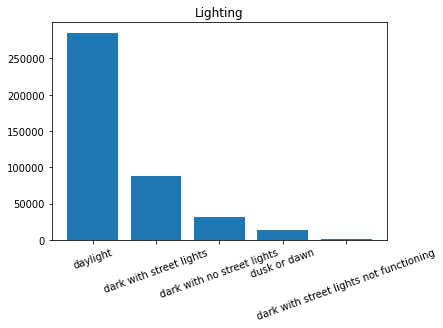

In [ ]:
labels = ['daylight', 'dark with street lights', 'dark with no street lights', 'dusk or dawn', 'dark with street lights not functioning']
counts = [285489, 88177, 32000, 14028, 870]
plt.bar(labels,counts)
plt.xticks(rotation=20)
plt.title('Lighting')
plt.show()

In [ ]:
crashes['lighting'] = labelencoder.fit_transform(crashes['lighting'])

In [ ]:
crashes['lighting'].unique()

array([3, 0, 4, 1, 2])

# If the crash happens at an intersection

In [ ]:
crashes['intersection'].isnull().sum()

4640

In [ ]:
len(crashes['intersection'])

420564

In [ ]:
crashes.dropna(subset=['intersection'], inplace=True)

In [ ]:
crashes['intersection'].isnull().sum()

0

In [ ]:
crashes['intersection'].unique()

array(['1', '0'], dtype=object)

In [ ]:
crashes['intersection'] = labelencoder.fit_transform(crashes['intersection'])
crashes['intersection'].unique()

array([1, 0])

In [ ]:
crashes['intersection'].value_counts()

0    320367
1     95557
Name: intersection, dtype: int64

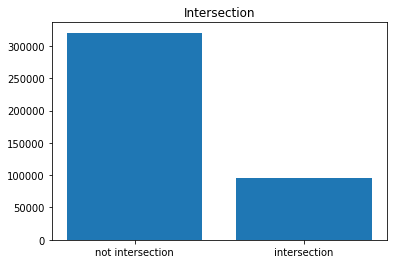

In [ ]:
labels = ['not intersection', 'intersection']
counts = [320367, 95557]
plt.bar(labels,counts)
plt.title('Intersection')
plt.show()

# if there is alcohol involved

### alcohol_involved indicates whether the crash involved a party that had been drinking, it's encoded as Y or blank. So blank values, or missing values should be replaced with the numeric value 0, replace the string value "1" with numeric value 1

In [ ]:
crashes['alcohol_involved'].isnull().sum()

371154

In [ ]:
len(crashes['alcohol_involved'])

415924

In [ ]:
crashes['alcohol_involved'].unique()

array([nan, '1'], dtype=object)

In [ ]:
crashes['alcohol_involved'].fillna("0", inplace=True)

In [ ]:
crashes['alcohol_involved'] = labelencoder.fit_transform(crashes['alcohol_involved'])
crashes['alcohol_involved'].unique()

array([0, 1])

In [ ]:
crashes['alcohol_involved'].value_counts()

0    371154
1     44770
Name: alcohol_involved, dtype: int64

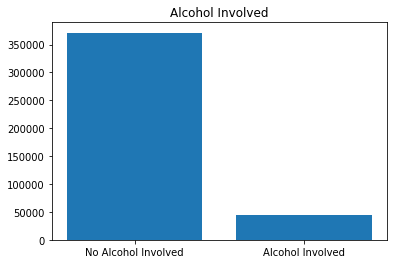

In [ ]:
labels = ['No Alcohol Involved', 'Alcohol Involved']
counts = [371154, 44770]
plt.bar(labels,counts)
plt.title("Alcohol Involved")
plt.show()

# total parties counts in the crash

In [ ]:
crashes['party_count'].isnull().sum()

0

In [ ]:
crashes['party_count'].unique()

array(['2', '1', '3', '4', '5', '6', '7', '9', '8', '10', '20', '11',
       '12', '13'], dtype=object)

In [ ]:
crashes['party_count'] = pd.to_numeric(crashes['party_count'], downcast="integer")

In [ ]:
crashes['party_count'].unique()

array([ 2,  1,  3,  4,  5,  6,  7,  9,  8, 10, 20, 11, 12, 13], dtype=int8)

In [ ]:
crashes['party_count'].value_counts()

2     281858
1      81855
3      41102
4       8655
5       1833
6        425
7        119
8         48
9         18
10         5
11         3
20         1
12         1
13         1
Name: party_count, dtype: int64

In [ ]:
crashes['party_count'].value_counts().index

Int64Index([2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 12, 13], dtype='int64')

In [ ]:
crashes['party_count'].value_counts().values

array([281858,  81855,  41102,   8655,   1833,    425,    119,     48,
           18,      5,      3,      1,      1,      1])

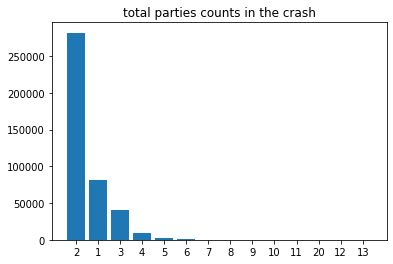

In [ ]:
labels = ['2', '1', '3', '4', '5', '6', '7', '8', '9', '10', '11', '20', '12', '13']
counts = [281858, 81855, 41102, 8655, 1833, 425, 119, 48, 18, 5, 3, 1, 1, 1]
plt.bar(labels,counts)
plt.title("total parties counts in the crash")
plt.show()

### Normalize the Party Count data - Z score

In [ ]:
crashes['party_count'] = (crashes['party_count'] - np.average(crashes['party_count'])) / np.std(crashes['party_count'])
crashes['party_count']

0         0.054245
1        -1.437061
2         0.054245
3         1.545552
4         1.545552
            ...   
426223    0.054245
426224    1.545552
426225    1.545552
426226    0.054245
426227    0.054245
Name: party_count, Length: 415924, dtype: float64

# Population

In [ ]:
crashes['population'].isnull().sum()

0

In [ ]:
crashes['population'].unique()

array(['>250000', '2500 to 10000', '25000 to 50000', 'unincorporated',
       '50000 to 100000', '100000 to 250000', '10000 to 25000', '<2500'],
      dtype=object)

In [ ]:
crashes['population'].value_counts()

>250000             103360
unincorporated       94484
100000 to 250000     79043
50000 to 100000      76858
25000 to 50000       36631
10000 to 25000       17649
2500 to 10000         5880
<2500                 2019
Name: population, dtype: int64

In [ ]:
crashes['population'].value_counts().index

Index(['>250000', 'unincorporated', '100000 to 250000', '50000 to 100000',
       '25000 to 50000', '10000 to 25000', '2500 to 10000', '<2500'],
      dtype='object')

In [ ]:
np.array(crashes['population'].value_counts())

array([103360,  94484,  79043,  76858,  36631,  17649,   5880,   2019])

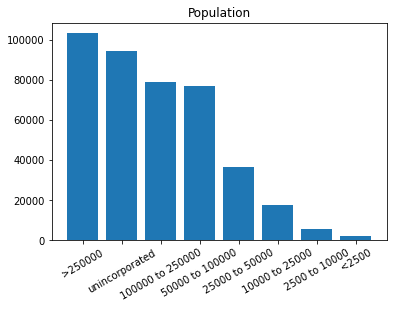

In [ ]:
labels = ['>250000', 'unincorporated', '100000 to 250000', '50000 to 100000', '25000 to 50000', '10000 to 25000', '2500 to 10000', '<2500']
counts = [103360, 94484, 79043, 76858, 36631, 17649, 5880, 2019]
plt.bar(labels,counts)
plt.xticks(rotation=30)
plt.title('Population')
plt.show()

In [ ]:
crashes['population'] = labelencoder.fit_transform(crashes['population'])
crashes['population'].unique()

array([6, 2, 3, 7, 4, 1, 0, 5])

### Checking for missing values before proceeding to make prediction for each county

In [ ]:
check_missing_values = crashes[['hit_and_run', 'road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']]
check_missing_values.isnull().sum()

hit_and_run         0
road_surface        0
lighting            0
intersection        0
alcohol_involved    0
party_count         0
population          0
dtype: int64

In [ ]:
# # Try to use GridSearchCV to tune MLP Classifier parameters
# parameters = {
#     'hidden_layer_sizes': [(10,), (20,)],
#     'activation': ['logistic'],
#     'solver': ['sgd'],
#     'max_iter': [900, 1300]
# }

# clf = GridSearchCV(MLPClassifier(random_state=42), parameters, n_jobs=-1)

# crashes_GridSearchCV = crashes[['hit_and_run', 'road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']]
# X = crashes_GridSearchCV[['road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']]
# Y = crashes_GridSearchCV['hit_and_run']

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# clf.fit(X_train,Y_train)

# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)

### Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'max_iter': 900, 'solver': 'sgd'}

In [ ]:
def predict_hit_and_run_for_county(county):
  df_county = crashes[crashes['county_location'] == county]
  df_county = df_county[['hit_and_run', 'road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']]
  X = df_county[['road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']]
  Y = df_county['hit_and_run']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  clf = MLPClassifier(hidden_layer_sizes=(10), max_iter=900, activation = 'logistic', solver='sgd', verbose=0, random_state=42)
  clf.fit(X_train,Y_train)
  y_pred_train = clf.predict(X_test)
  accuracyScore = accuracy_score(Y_test, y_pred_train)
  f1Score = f1_score(Y_test, y_pred_train)
  return (accuracyScore, f1Score)

In [ ]:
county_accuracy_score_all_counties = {}
county_f1_score_all_counties = {}

for county in crashes['county_location'].unique():
  accuracyScore, f1Score = predict_hit_and_run_for_county(county)
  county_accuracy_score_all_counties[county] = accuracyScore
  county_f1_score_all_counties[county] = f1Score

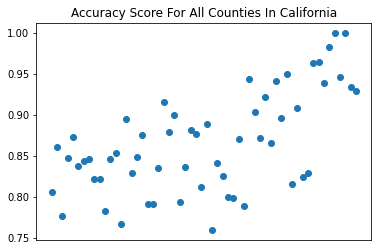

In [ ]:
fig = plt.scatter(*zip(*county_accuracy_score_all_counties.items()))
fig.axes.get_xaxis().set_visible(False)
plt.title("Accuracy Score For All Counties In California")
plt.show()

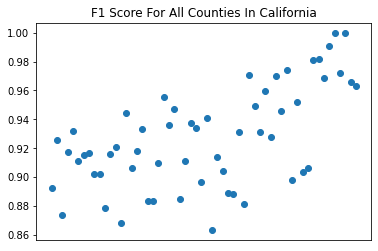

In [ ]:
fig = plt.scatter(*zip(*county_f1_score_all_counties.items()))
fig.axes.get_xaxis().set_visible(False)
plt.title("F1 Score For All Counties In California")
plt.show()

In [ ]:
def find_keys_with_max_values(dictionary):
  keys = []
  for key, value in dictionary.items():
    if value == 1:
      keys.append(key)
  print(keys)

In [ ]:
find_keys_with_max_values(county_accuracy_score_all_counties)

['modoc', 'sierra']


In [ ]:
find_keys_with_max_values(county_f1_score_all_counties)

['modoc', 'sierra']


### The county with the highest accuracy score and F1 score is Sierra

In [ ]:
def visualize_feature_by_county(county, feature):
  df_county = crashes[crashes['county_location'] == county]
  data = dict(df_county[feature].value_counts())
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title(feature)
  plt.show()

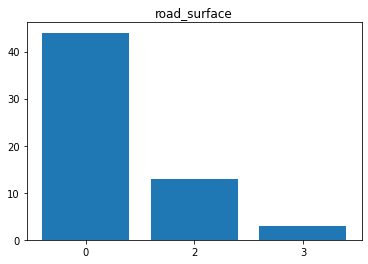

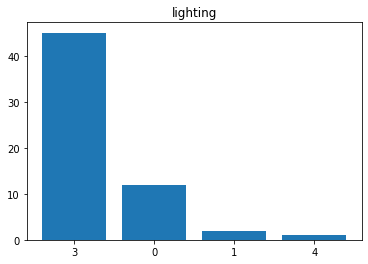

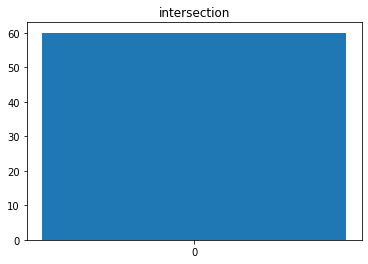

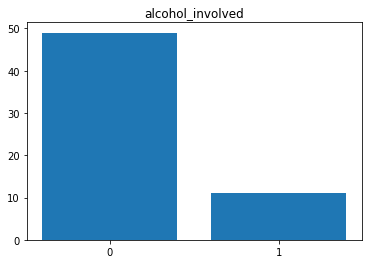

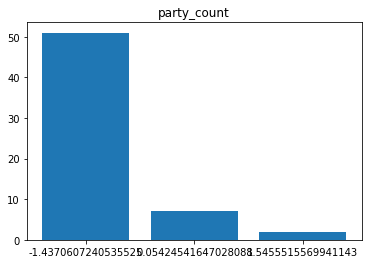

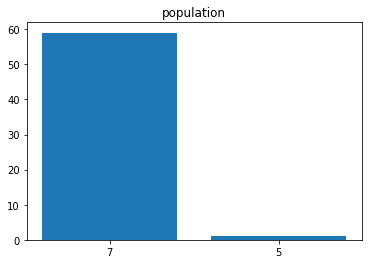

In [ ]:
for feature in ['road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']:
  visualize_feature_by_county('sierra', feature)

## From the graph we can see that some of the features in the Sierra county is quite imbalanced, it could be overfitting with an accuracy of 1, try the oversampling technique and see if it reduces overfitting

In [ ]:
def predict_hit_and_run_for_county_with_oversampling(county):
  df_county = crashes[crashes['county_location'] == county]
  df_county = df_county[['hit_and_run', 'road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']]
  X = df_county[['road_surface', 'lighting', 'intersection', 'alcohol_involved', 'party_count', 'population']]
  Y = df_county['hit_and_run']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  clf = MLPClassifier(hidden_layer_sizes=(10), max_iter=900, activation = 'logistic', solver='sgd', verbose=0, random_state=42)
  sm = SMOTE(k_neighbors=1, random_state=42)
  X_train,Y_train = sm.fit_resample(X_train,Y_train)

  clf.fit(X_train,Y_train)
  y_pred_train = clf.predict(X_test)
  accuracyScore = accuracy_score(Y_test, y_pred_train)
  f1Score = f1_score(Y_test, y_pred_train)
  return (accuracyScore, f1Score)

In [ ]:
accuracyScore, f1Score = predict_hit_and_run_for_county_with_oversampling('sierra')
print(accuracyScore)

0.8333333333333334


In [ ]:
print(f1Score)

0.9090909090909091


## It seems that the Oversampling technique does help with the problem of overfitting due to class imbalance problem in the data

## Now make a map for the predictions of 9 counties instead of for all counties.
## Since some of the counties might have the class imbalance problem in those data, try to reduce overfitting


In [ ]:
county_accuracy_score = {}
county_f1_score = {}
bay_area_counties_list = ["alameda", "contra costa", "marin", "napa", "san francisco", "san mateo", "santa clara", "solano", "sonoma"]
for county in bay_area_counties_list:
  accuracyScore, f1Score = predict_hit_and_run_for_county(county)
  county_accuracy_score[county] = accuracyScore
  county_f1_score[county] = f1Score

In [ ]:
bay_area_counties = gpd.read_file("Bay_Area_Counties")
bay_area_counties

,county,fipsstco,objectid,geometry
0,Alameda,06001,1.0,"MULTIPOLYGON (((-122.21496 37.76113, -122.2156..."
1,Contra Costa,06013,2.0,"MULTIPOLYGON (((-121.95091 38.05392, -121.9505..."
2,Marin,06041,3.0,"MULTIPOLYGON (((-122.86959 38.02140, -122.8711..."
3,Napa,06055,4.0,"POLYGON ((-122.20246 38.68898, -122.20232 38.6..."
4,San Francisco,06075,5.0,"MULTIPOLYGON (((-122.47738 37.81103, -122.4763..."
5,San Mateo,06081,6.0,"MULTIPOLYGON (((-122.50248 37.70813, -122.4977..."
6,Santa Clara,06085,7.0,"MULTIPOLYGON (((-122.02427 37.46094, -122.0203..."
7,Solano,06095,8.0,"MULTIPOLYGON (((-122.01053 38.09290, -122.0110..."
8,Sonoma,06097,9.0,"MULTIPOLYGON (((-123.53354 38.76841, -123.5333..."


In [ ]:
data = {"county_location": list(county_accuracy_score.keys()), "model_accuracy": list(county_accuracy_score.values())}
county_results_df = pd.DataFrame(data=data).set_index(bay_area_counties.index.values)
county_results_df.head(3)

,county_location,model_accuracy
0,alameda,0.758997
1,contra costa,0.828512
2,marin,0.848214


In [ ]:
results = county_results_df["model_accuracy"].values

In [ ]:
bay_area_counties["model_accuracy"] = results
bay_area_counties.head(3)

,county,fipsstco,objectid,geometry,model_accuracy
0,Alameda,06001,1.0,"MULTIPOLYGON (((-122.21496 37.76113, -122.2156...",0.758997
1,Contra Costa,06013,2.0,"MULTIPOLYGON (((-121.95091 38.05392, -121.9505...",0.828512
2,Marin,06041,3.0,"MULTIPOLYGON (((-122.86959 38.02140, -122.8711...",0.848214


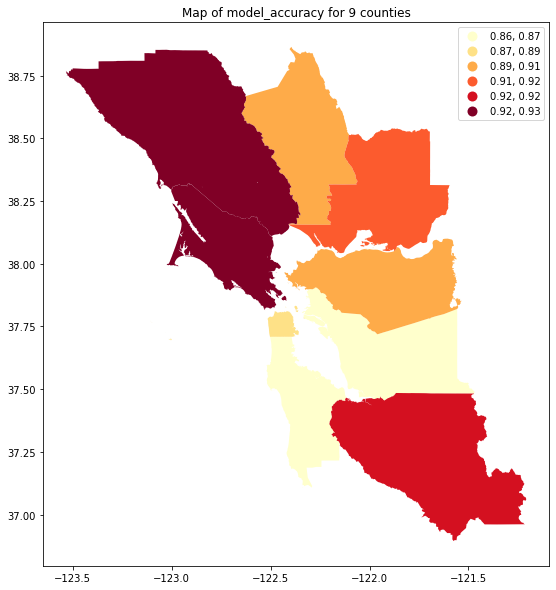

In [ ]:
# ["alameda", "contra costa", "marin", "napa", "san francisco", "san mateo", "santa clara", "solano", "sonoma"]
bay_area_counties.plot(column="model_accuracy", figsize=(10,10), legend=True, cmap="YlOrRd", scheme="quantiles", k=6)
plt.title(f"Map of model_accuracy for 9 counties");

## Now a map for the F1 scores

In [ ]:
data = {"county_location": list(county_f1_score.keys()), "model_accuracy": list(county_f1_score.values())}
county_results_df = pd.DataFrame(data=data).set_index(bay_area_counties.index.values)
county_results_df.head(3)

,county_location,model_accuracy
0,alameda,0.862989
1,contra costa,0.906215
2,marin,0.917874


In [ ]:
results = county_results_df["model_accuracy"].values

In [ ]:
bay_area_counties["model_accuracy"] = results
bay_area_counties.head(3)

,county,fipsstco,objectid,geometry,model_accuracy
0,Alameda,06001,1.0,"MULTIPOLYGON (((-122.21496 37.76113, -122.2156...",0.862989
1,Contra Costa,06013,2.0,"MULTIPOLYGON (((-121.95091 38.05392, -121.9505...",0.906215
2,Marin,06041,3.0,"MULTIPOLYGON (((-122.86959 38.02140, -122.8711...",0.917874


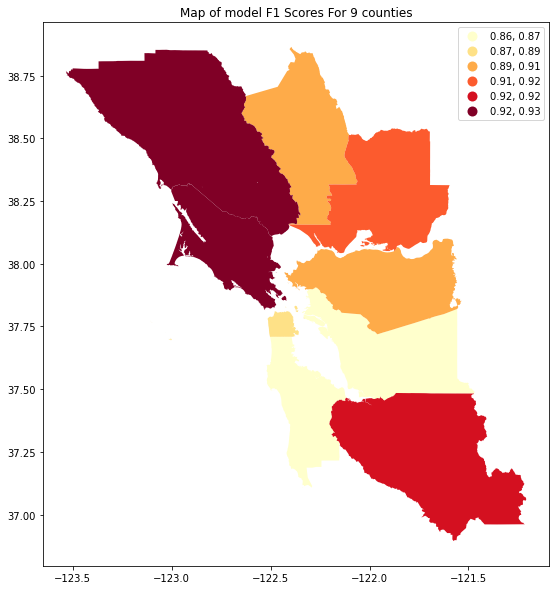

In [ ]:
# ["alameda", "contra costa", "marin", "napa", "san francisco", "san mateo", "santa clara", "solano", "sonoma"]
bay_area_counties.plot(column="model_accuracy", figsize=(10,10), legend=True, cmap="YlOrRd", scheme="quantiles", k=6)
plt.title(f"Map of model F1 Scores For 9 counties");